In [1]:
# Model Selection

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

In [3]:
#loading datasets
from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing()

In [4]:
print(cali_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
#converting to Pandas DataFrame

cali_df = pd.DataFrame(cali_data.data, columns = cali_data.feature_names)

In [6]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
#making a visualisation

def plot(feature):
    plt.plot(cali_df[feature], cali_data.target, '.')
    plt.xlabel(feature)
    plt.ylabel('Median prices of houses')
    
    
menu = cali_data.feature_names
interact(plot, feature = menu)

interactive(children=(Dropdown(description='feature', options=('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', …

<function __main__.plot(feature)>

In [8]:
# Building a decision tree for better understanding

#importing essentials

from sklearn import tree
from sklearn.externals.six import StringIO
from IPython import display
from sklearn.tree import export_graphviz

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


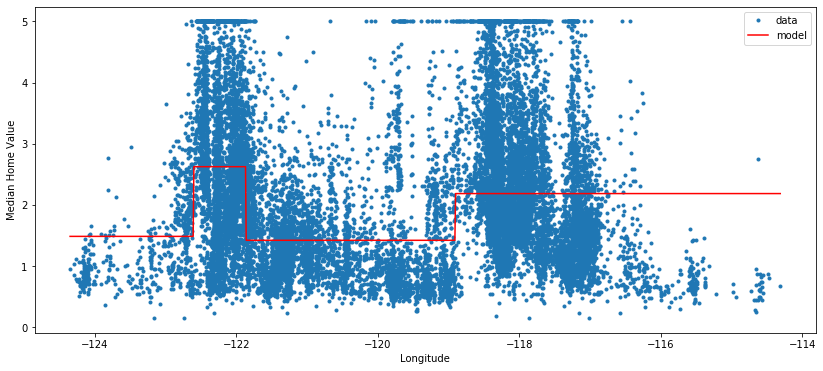

In [12]:
#fitting the model

model = tree.DecisionTreeRegressor( max_depth = 2)
model.fit(cali_df['Longitude'].to_frame(), cali_data.target)

#plotting

plt.figure(figsize=[14,6])
plt.plot( cali_df['Longitude'],cali_data.target, '.', label = 'data')
plt.plot(cali_df['Longitude'].sort_values(), 
        model.predict( cali_df['Longitude'].sort_values().to_frame()),
        'r-', label = 'model')

plt.xlabel('Longitude')
plt.ylabel('Median Home Value')
plt.legend()

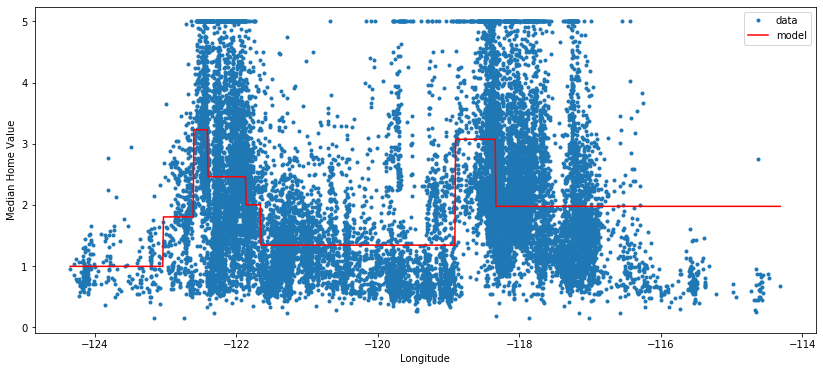

In [11]:
#SHOWS THAT AS NUMBER OF END NODES INCREASE, SO DOES THE PREDICTION BUCKETS INCREASE TOO

#fitting the model

from sklearn import tree
model = tree.DecisionTreeRegressor( max_depth = 3)
model.fit(cali_df['Longitude'].to_frame(), cali_data.target)

#plotting
plt.figure(figsize=[14,6])
plt.plot( cali_df['Longitude'],cali_data.target, '.', label = 'data')
plt.plot(cali_df['Longitude'].sort_values(), 
        model.predict( cali_df['Longitude'].sort_values().to_frame()),
        'r-', label = 'model')

plt.xlabel('Longitude')
plt.ylabel('Median Home Value')
plt.legend()

### 